<a href="https://colab.research.google.com/github/tanmayChava/Ship-Prediction/blob/main/Ship_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction
### In this project, we aim to build a deep learning model to classify images of ships into five different categories: Cargo, Military, Carrier, Cruise, and Tankers. Ship classification is important for maritime surveillance, port management, and naval operations. Leveraging transfer learning, we use the MobileNetV2 architecture pretrained on ImageNet to efficiently extract relevant features from ship images, even with a limited dataset.

### The dataset, sourced from Kaggle, contains thousands of labeled images of ships with their corresponding categories. By preprocessing the images and applying transfer learning, the model learns to distinguish subtle differences among ship types. This approach significantly reduces training time and improves accuracy compared to training a model from scratch.

### Through this project, we demonstrate the effectiveness of modern convolutional neural networks combined with transfer learning for practical image classification tasks in the maritime domain.



In [ ]:
!pip install opendatasets

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from keras.layers import Dense, Conv2D, Flatten
from tensorflow.keras import datasets, layers, models
from tensorflow.math import confusion_matrix
from sklearn.model_selection import train_test_split
from tensorflow.keras.callbacks import ModelCheckpoint
import os
import cv2
import warnings
warnings.filterwarnings('ignore')

In [ ]:
import opendatasets as od
od.download("https://www.kaggle.com/datasets/arpitjain007/game-of-deep-learning-ship-datasets/data")

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: tanmaychavhan
Your Kaggle Key: ··········
Dataset URL: https://www.kaggle.com/datasets/arpitjain007/game-of-deep-learning-ship-datasets


100%|██████████| 80.9M/80.9M [00:00<00:00, 1.21GB/s]

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:

train_dir = '/content/game-of-deep-learning-ship-datasets/train'
test_dir = '/content/game-of-deep-learning-ship-datasets/test_ApKoW4T.csv'

In [ ]:
# If you have a labels CSV (e.g., train_labels.csv)

# Example format:

# filename	      label

# ship_0001.jpg  	Cargo
# ship_0002.jpg	  Military

In [ ]:
labels_df = pd.read_csv('/content/game-of-deep-learning-ship-datasets/train/train.csv')

In [ ]:
print(labels_df['category'].unique())

[1 2 3 4 5]


In [ ]:
# Define label mapping
int_to_label = {
    1: 'Cargo',
    2: 'Military',
    3: 'Carrier',
    4: 'Cruise',
    5: 'Tankers'
}

# Apply mapping to the 'category' column
labels_df['category'] = labels_df['category'].map(int_to_label)

In [ ]:
print(labels_df['category'].unique())

['Cargo' 'Military' 'Carrier' 'Cruise' 'Tankers']


In [ ]:
print(labels_df.columns)
labels_df.head()

Index(['image', 'category'], dtype='object')


,image,category
0,2823080.jpg,Cargo
1,2870024.jpg,Cargo
2,2662125.jpg,Military
3,2900420.jpg,Carrier
4,2804883.jpg,Military


In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)

train_generator = train_datagen.flow_from_dataframe(
    dataframe=labels_df,
    directory='/content/game-of-deep-learning-ship-datasets/train/images',
    x_col='image',
    y_col='category',
    subset='training',
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical'
)

val_generator = train_datagen.flow_from_dataframe(
    dataframe=labels_df,
    directory='/content/game-of-deep-learning-ship-datasets/train/images',
    x_col='image',
    y_col='category',
    subset='validation',
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical'
)


Found 5002 validated image filenames belonging to 5 classes.
Found 1250 validated image filenames belonging to 5 classes.


In [ ]:
# Model Train

In [ ]:
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam

# Load the base model (without top layers)
base_model = MobileNetV2(input_shape=(224, 224, 3), include_top=False, weights='imagenet')

# Add custom classification head
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(128, activation='relu')(x)
output = Dense(5, activation='softmax')(x)  # 5 ship classes

model = Model(inputs=base_model.input, outputs=output)

# Freeze the base model (optional at first)
for layer in base_model.layers:
    layer.trainable = False

# Compile the model
model.compile(optimizer=Adam(learning_rate=1e-4),
              loss='categorical_crossentropy',
              metrics=['accuracy'])


9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
history = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=10
)

Epoch 1/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 243s 1s/step - accuracy: 0.5465 - loss: 1.1601 - val_accuracy: 0.8128 - val_loss: 0.5609
Epoch 2/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 228s 1s/step - accuracy: 0.8210 - loss: 0.5141 - val_accuracy: 0.8440 - val_loss: 0.4481
Epoch 3/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 228s 1s/step - accuracy: 0.8582 - loss: 0.4079 - val_accuracy: 0.8520 - val_loss: 0.4149
Epoch 4/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 229s 1s/step - accuracy: 0.8736 - loss: 0.3686 - val_accuracy: 0.8568 - val_loss: 0.3937
Epoch 5/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 229s 1s/step - accuracy: 0.8811 - loss: 0.3402 - val_accuracy: 0.8616 - val_loss: 0.3769
Epoch 6/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 227s 1s/step - accuracy: 0.8961 - loss: 0.3090 - val_accuracy: 0.8648 - val_loss: 0.3663
Epoch 7/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 228s 1s/step - accuracy: 0.9002 - loss: 0.2823 - val_accuracy: 0.8648 - val_loss: 0.3645
Epoch 8/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 228s 1s/step - accuracy: 0.9136 - loss: 0.2709 - val_accu

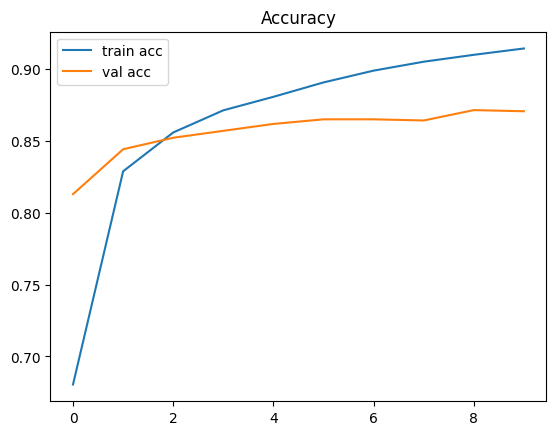

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='train acc')
plt.plot(history.history['val_accuracy'], label='val acc')
plt.title('Accuracy')
plt.legend()
plt.show()

## Conclusion

### Dataset: You used the Kaggle ship images dataset with 5 ship categories: Cargo, Military, Carrier, Cruise, and Tankers.

### Preprocessing: Images were resized to 224x224 pixels and normalized with rescaling.

### Model Architecture: MobileNetV2 pretrained on ImageNet was used as the base model, with a custom classification head of GlobalAveragePooling2D, a dense layer of 128 units (ReLU), and a 5-class softmax output layer.

### Training Setup: The base model was initially frozen and only the classification head trained using the Adam optimizer with a learning rate of 1e-4. Training ran for 10 epochs.

### Performance:

### The training accuracy improved from around 54.6% to over 91.4%.

### Validation accuracy steadily improved, reaching approximately 87.0%.

### Validation loss decreased consistently, indicating good model learning without overfitting.

### Interpretation: The model demonstrated effective learning and generalization, achieving strong accuracy on validation data. This indicates that the MobileNetV2-based transfer learning approach is well-suited for classifying different ship types in this dataset.